In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [23]:
# Load the data
df = pd.read_csv('summary.csv')

In [24]:
# drop duplicates
#df = df.drop_duplicates()
df.head(5)

,Time Limit,Model Type,MSE Learned,MSE Test,Level,Hidden Layers and Units,run,rootdir
0,"[0, 10]",SG,3.115614e-04,0.000233,2,3X5,"FBPINN_SG_SaturatedGrowthModel_FCN_[1, 2]-lev_...",MLDDVsSLDD/SGMultilevel\0-10
1,"[10, 24]",SG,5.700751e-05,0.014708,2,3X5,"FBPINN_SG_SaturatedGrowthModel_FCN_[1, 2]-lev_...",MLDDVsSLDD/SGMultilevel\10-24
2,"[0, 24]",SG,1.214040e-04,0.000134,2,3X5,"FBPINN_SG_SaturatedGrowthModel_FCN_[1, 2]-lev_...",MLDDVsSLDD/SGMultilevel\0-24
3,"[0, 10]",SG,7.633118e-05,0.000092,1,3X5,FBPINN_SG_SaturatedGrowthModel_FCN_[1]-lev_1.9...,MLDDVsSLDD/SGMultilevel\0-10
4,"[10, 24]",SG,3.167589e-07,0.000316,1,3X5,FBPINN_SG_SaturatedGrowthModel_FCN_[1]-lev_1.9...,MLDDVsSLDD/SGMultilevel\10-24


In [25]:
# only take the dataframe with df['Level']== 1 and 2
df = df[df['Level'] < 3]
df.head(5)

,Time Limit,Model Type,MSE Learned,MSE Test,Level,Hidden Layers and Units,run,rootdir
0,"[0, 10]",SG,3.115614e-04,0.000233,2,3X5,"FBPINN_SG_SaturatedGrowthModel_FCN_[1, 2]-lev_...",MLDDVsSLDD/SGMultilevel\0-10
1,"[10, 24]",SG,5.700751e-05,0.014708,2,3X5,"FBPINN_SG_SaturatedGrowthModel_FCN_[1, 2]-lev_...",MLDDVsSLDD/SGMultilevel\10-24
2,"[0, 24]",SG,1.214040e-04,0.000134,2,3X5,"FBPINN_SG_SaturatedGrowthModel_FCN_[1, 2]-lev_...",MLDDVsSLDD/SGMultilevel\0-24
3,"[0, 10]",SG,7.633118e-05,0.000092,1,3X5,FBPINN_SG_SaturatedGrowthModel_FCN_[1]-lev_1.9...,MLDDVsSLDD/SGMultilevel\0-10
4,"[10, 24]",SG,3.167589e-07,0.000316,1,3X5,FBPINN_SG_SaturatedGrowthModel_FCN_[1]-lev_1.9...,MLDDVsSLDD/SGMultilevel\10-24


[INFO] 2024-05-19 19:27:43 - Loading model from:
../MLDDVsSLDD/SGMultilevel\0-10/models/FBPINN_SG_SaturatedGrowthModel_FCN_[1, 2]-lev_1.9-ww_3-hl_5-hu_200-n_[0, 10]-tl/model_00050000.jax


[INFO] 2024-05-19 19:27:43 - x_batch
[INFO] 2024-05-19 19:27:43 - (500, 1), float32, ArrayImpl
[INFO] 2024-05-19 19:27:43 - x_take
[INFO] 2024-05-19 19:27:43 - (1094, 1), float32, ArrayImpl
[INFO] 2024-05-19 19:27:43 - Loading model from:
../MLDDVsSLDD/SGMultilevel\10-24/models/FBPINN_SG_SaturatedGrowthModel_FCN_[1, 2]-lev_1.9-ww_3-hl_5-hu_200-n_[10, 24]-tl/model_00050000.jax
[INFO] 2024-05-19 19:27:43 - x_batch
[INFO] 2024-05-19 19:27:43 - (500, 1), float32, ArrayImpl
[INFO] 2024-05-19 19:27:43 - x_take
[INFO] 2024-05-19 19:27:43 - (1131, 1), float32, ArrayImpl
[INFO] 2024-05-19 19:27:43 - Loading model from:
../MLDDVsSLDD/SGMultilevel\0-24/models/FBPINN_SG_SaturatedGrowthModel_FCN_[1, 2]-lev_1.9-ww_3-hl_5-hu_200-n_[0, 24]-tl/model_00050000.jax
[INFO] 2024-05-19 19:27:43 - x_batch
[INFO] 2024-05-19 19:27:43 - (500, 1), float32, ArrayImpl
[INFO] 2024-05-19 19:27:43 - x_take
[INFO] 2024-05-19 19:27:43 - (1224, 1), float32, ArrayImpl
[INFO] 2024-05-19 19:27:43 - Loading model from:
../ML

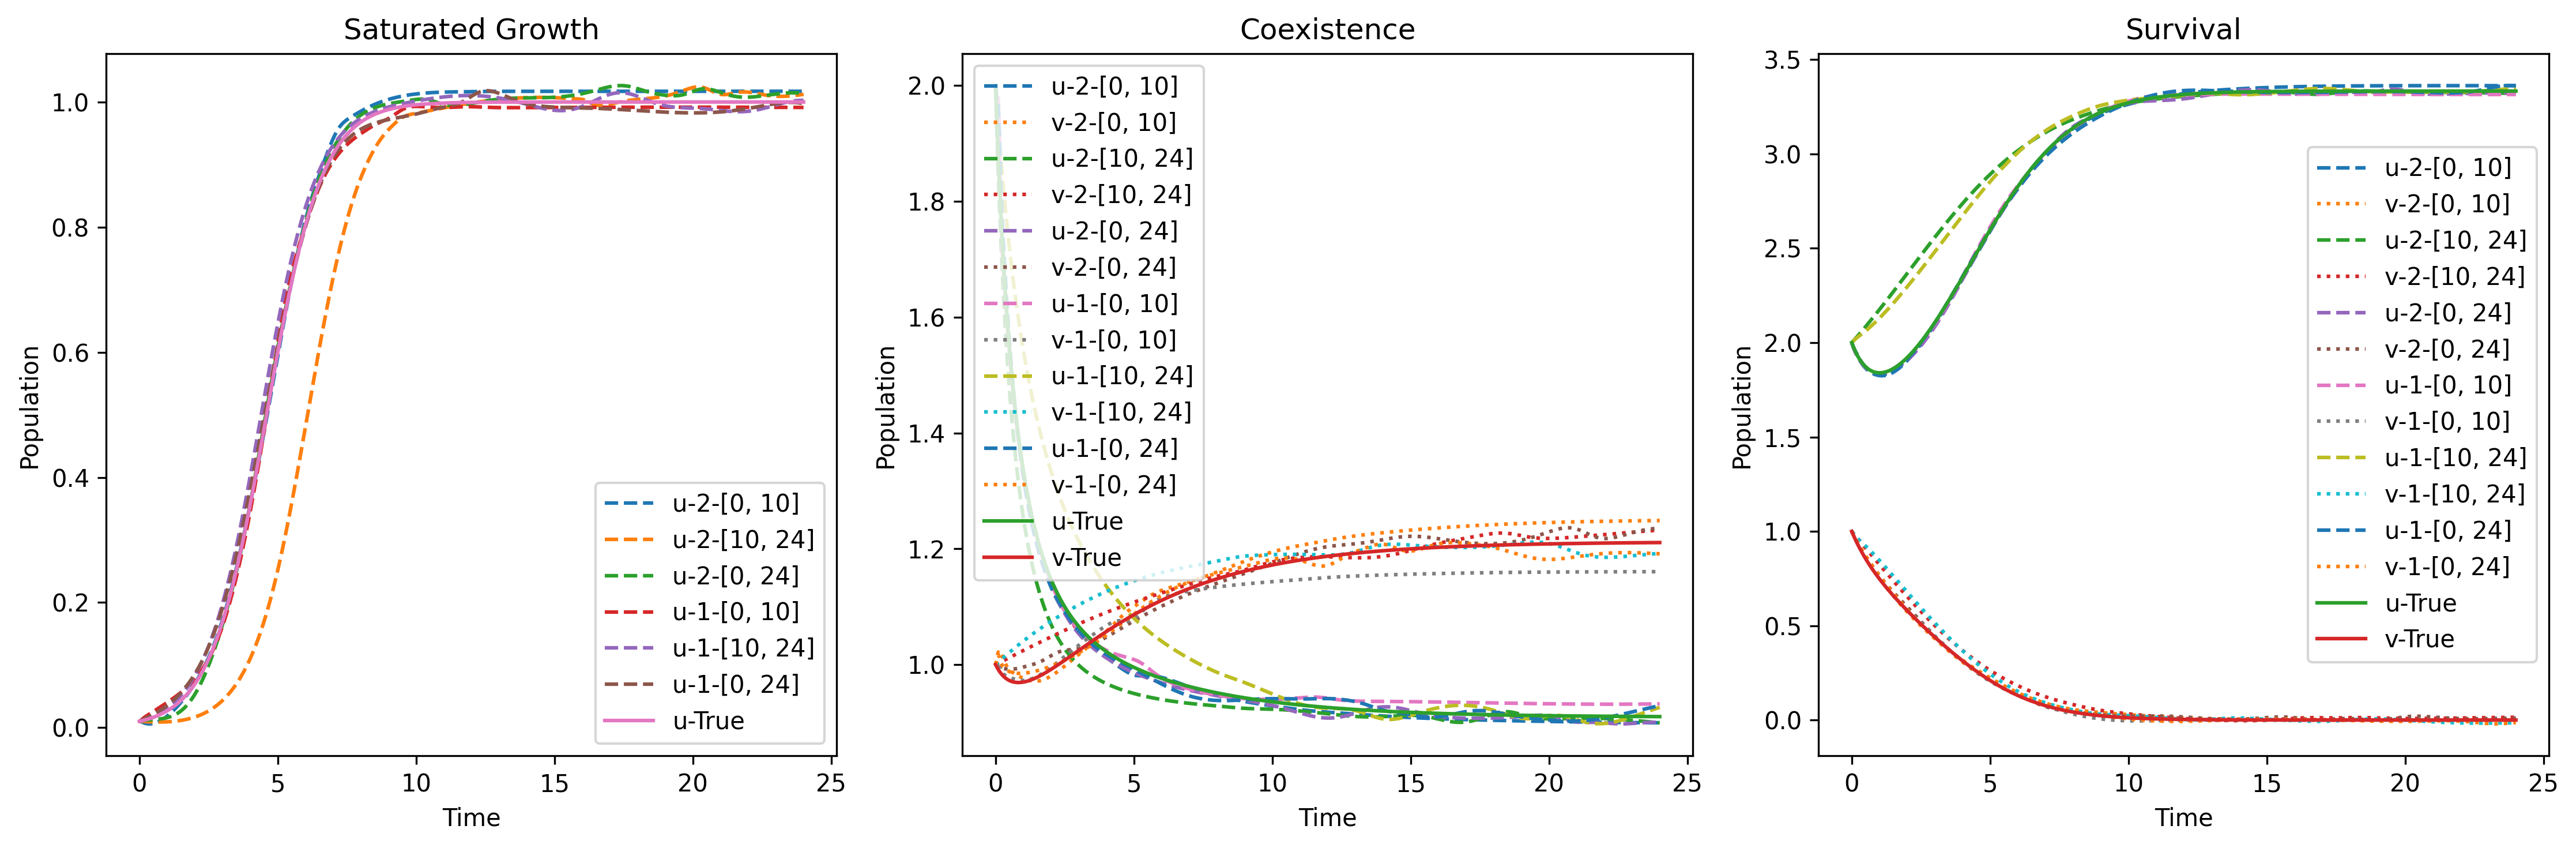

In [26]:
import matplotlib.pyplot as plt
from fbpinns.analysis import load_model
from FBPINNsModel.plot import get_us, get_x_batch

def plot_models(df, title=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots()

    # Loop over each row of df
    for i in range(len(df)):
        row = df.iloc[i]
        c, model = load_model(row['run'], rootdir="../"+row['rootdir']+"/")
        u_exact, u_test, u_learned = get_us(c, model, type='FBPINN')
        x_batch = get_x_batch(c, model)

        ax.plot(x_batch, u_test[:, 0], '--', label=f'u-{row["Level"]}-{row["Time Limit"]}')
        if u_exact.shape[1] == 2:
            ax.plot(x_batch, u_test[:, 1], ':', label=f'v-{row["Level"]}-{row["Time Limit"]}')
       # print(u_exact.shape, u_test.shape, u_learned.shape, x_batch.shape)
    ax.plot(x_batch, u_exact[:, 0], label='u-True')
    if u_exact.shape[1] == 2:
        ax.plot(x_batch, u_exact[:, 1], label='v-True')
    
    if title:
        ax.set_title(title)
    
    ax.legend()
    ax.set_xlabel('Time')
    ax.set_ylabel('Population')
    if ax is None:
        plt.show()

# separate DFs for each model type  
SG_df = df[df['Model Type'] == 'SG'].reset_index(drop=True)
Coex_df = df[df['Model Type'] == 'Coex'].reset_index(drop=True)
Surv_df = df[df['Model Type'] == 'Surv'].reset_index(drop=True)
# plot with 3 subplot in a row
fig, axs = plt.subplots(1, 3, figsize=(15, 5), dpi=300)
plot_models(SG_df, title='Saturated Growth', ax=axs[0])
plot_models(Coex_df, title='Coexistence', ax=axs[1])
plot_models(Surv_df, title='Survival', ax=axs[2])
plt.tight_layout()
# Save plot 
plt.savefig('summary_SLvsML.png')

In [27]:
# separate DFs for each model type  
SG_df = df[df['Model Type'] == 'SG'].reset_index(drop=True)
Coex_df = df[df['Model Type'] == 'Coex'].reset_index(drop=True)
Surv_df = df[df['Model Type'] == 'Surv'].reset_index(drop=True)

# get rid of the columns of dfs- ['run', 'rootdir']
SG_df = SG_df.drop(columns=['run', 'rootdir'])
Coex_df = Coex_df.drop(columns=['run', 'rootdir'])
Surv_df = Surv_df.drop(columns=['run', 'rootdir'])
combined_df = pd.concat([SG_df, Coex_df, Surv_df], axis=0).reset_index(drop=True)
combined_df



,Time Limit,Model Type,MSE Learned,MSE Test,Level,Hidden Layers and Units
0,"[0, 10]",SG,3.115614e-04,0.000233,2,3X5
1,"[10, 24]",SG,5.700751e-05,0.014708,2,3X5
2,"[0, 24]",SG,1.214040e-04,0.000134,2,3X5
3,"[0, 10]",SG,7.633118e-05,0.000092,1,3X5
4,"[10, 24]",SG,3.167589e-07,0.000316,1,3X5
5,"[0, 24]",SG,7.327083e-05,0.000166,1,3X5
6,"[0, 10]",Coex,3.921361e-04,0.000409,2,3X5
7,"[10, 24]",Coex,8.029187e-04,0.000829,2,3X5
8,"[0, 24]",Coex,1.405047e-04,0.000148,2,3X5
9,"[0, 10]",Coex,6.919567e-04,0.000738,1,3X5


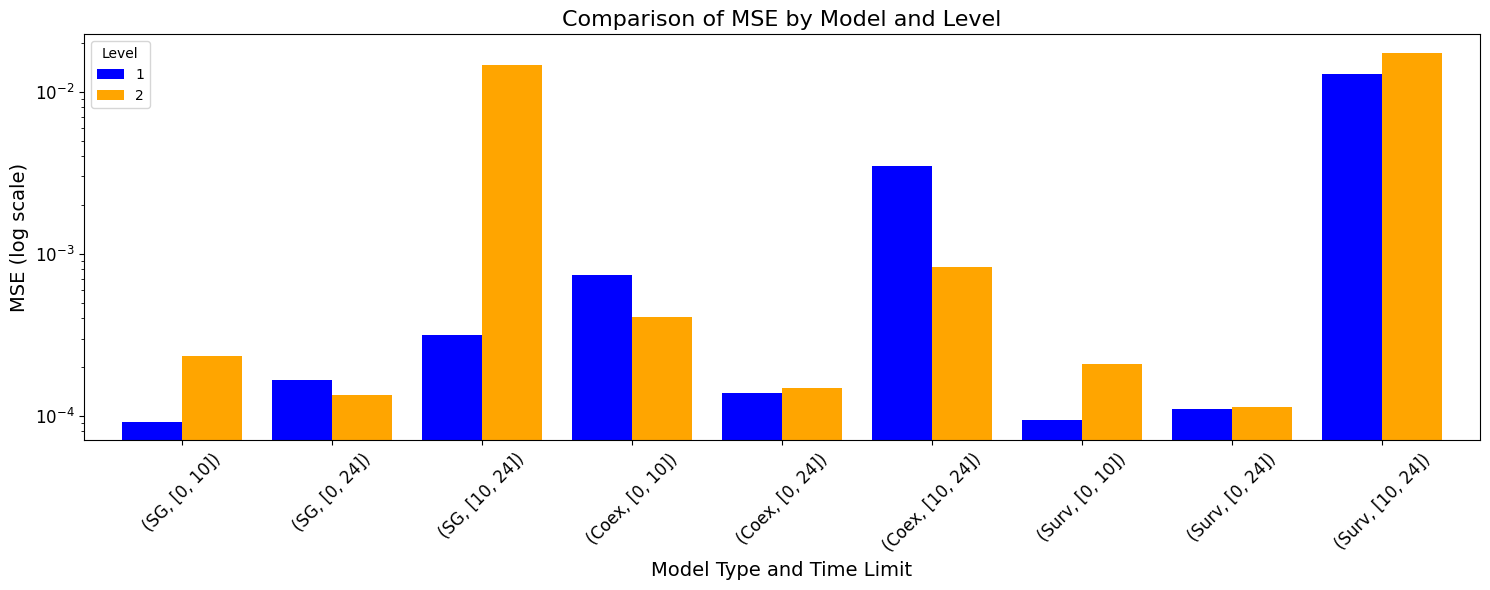

In [28]:
# plot MSE by model and Level
fig, ax = plt.subplots(figsize=(15, 6))

pivot_df = combined_df.pivot_table(index=['Model Type', 'Time Limit'], columns='Level', values ='MSE Test')
# index order
pivot_df = pivot_df.reindex(['SG', 'Coex', 'Surv'], level=0)

# Plot
pivot_df.plot(kind='bar', ax=ax, logy=True, color=['blue', 'orange','green'], width=0.8)

ax.set_ylabel('MSE (log scale)', fontsize=14)
ax.set_xlabel('Model Type and Time Limit', fontsize=14)
ax.set_title('Comparison of MSE by Model and Level', fontsize=16)
plt.xticks(rotation=45, fontsize = 12)
plt.yticks(fontsize=12)
plt.legend(title='Level')
plt.tight_layout()
# save plot
plt.savefig('MSE_by_Model_and_Level.png')